# TU257 - Assignment B

#### Student: Eamonn Kelly - student #: D24127620

#### Part 1 File - Text Mining


#### Problem Definition:
Ever increasingly people buy products and services off companies with whom they have no day to day dealings or relationship, and with supply chains being so diverse its ever harder to know if the company you are buying from has values which match your own.

This project is a Proof of Concept (PoC) to try answer the following question: 

<u>Question</u>: Can we perform Data Analysis and Classification on company reports to determine and predict how ethical a company is in relation to environmetal, social and governance (esg) criteria?

In other words, Can we gain a trustworthy ethical insight, into companies esg values based off data they themselves provide in their reports?

### File Structure:
1. Step1 - Data Identification
    - 1.1 Reports
    - 1.2 Identifying which companies to use
    - 1.3 Obtaining pdf files
1. Step 2 - Import packages
1. Step 3 - Data Exploration and Processing
    - 3.1 define variables
    - 3.2 try_extract_text function (try-except block to handle errors during pdf extraction)
    - 3.3 load_proc_file_csv function (to track files which have already been processed)
    - 3.4 save_proc_files_csv function (to track files which have already been processed)
    - 3.5 clean_pdf function: cleaning and tokenising pdf data
    - 3.6 process_file function (handle processing and csv file list and call clean_pdf per pdf file)
    - 3.7 Create per file data set i.e. data set stored a companyname, filename and exacted text on per file basis - used for model classification
1. Step 4 - Data Exploration and Analysis
    - 4.1 view data sample
    - 4.2 Create Profile report and quick check on data cleanliness i.e. duplicates, nulls values, unusual characters etc
    - 4.3 Remove empty text data row and verify its successful removal and remaining data integrity
    - 4.4 Export the data set to json for future re-use and backup and verify file created correctly
    - 4.5 Data aggregation per company function creation
    - 4.6 aggregate data on a per company basis - used for general analysis
    - 4.7 Display Data and Plot of word counts per company
    - 4.8 Plot - top 50 words with highest frequency per company
    - 4.9 Plot - wordcloud per word frequency per company
    - 4.10 Plot - positive ethical word count per company
    - 4.11 Plot - top 20 highest frequency words across all companies
    - 4.12 Plot - ethical words occurence per company - normalised per 100 words (as we do nto have even distribution of data for each company)
    -4.13 Data Exploration ansd Analysis - Conclusions
1. Step 5 - Classification Models
    - 5.1 - Split dataset into features and target labels
    - 5.2 - Verify variables are as expoected
    - 5.3 - Vectorize the text
    - 5.4 - Apply tf-idf transformation
    - 5.5 - Split data into train and test data and verify target variable data
    - 5.6 - Create Models, perform cross validation and plot ROC AUC
    - 5.7 - Plot Accuracy data
    - 5.8 - Apply SMOTE to data to oversample the minority class and verify target variable data
    - 5.9 - Create the Models using SMOTE data set
    - 5.10 - Evaluate Model Performance
1. Step 6 - Conclusions andf Lerarnings
    - 6.1 Challenges
    - 6.2 Improvements
1. Appendix  - References

### Step 1 - Data Identification

#### 1.1 Reports
- Most readily available data from companies being company reports publihsed on their own websites. Hence decided to use that data.
- Most companies typically have pages on their sites in the form of the below, where reports can be downloaded
    - \investors
    - \sustainability
- we did not include any 'investor' labelled reports as it they appear to be skewed in terms of financial terms occurrence as you would expect.
- Environment, Social and Governance (ESG) criteria are part of required reporting criteria for companies above a certain size. This is relatively recent requirement, but there should be sufficient data available.
- Issues:
    - reports are not standard or always in location or format you would expect.
    - Some companies do not create single report but create different reports for different criteria and have multiple reports per year.
    - Some companies embed esg details in graphics on website and only way to access is to scrape html. Decided not top scrape html to try standarise the sources from pdf only, to try make a level playing field in terms of types of sources.
    - Some reports have reports going back several years readily available, some companies do not.

#### 1.2 Identifying which companies to use
- Used Industry standard ESG ratings providers such as the below to help identify good and bad esg performers, as well as general web searches for good and bad stories and existing knowledge. There is no single source, rather multiple sources coming together to build a picture of a company. 
    - [MCSI - Morgan Stanley](https://www.msci.com/)
    - [BCorp](https://www.bcorporation.net/en-us/)
    - [Susdtainanalytics](https://www.sustainalytics.com/)
    - others aswell
- ease of access to reports was also a factor
- Also tried to have an irish element and choose some companies close to home where possible to keep interesting.
- Also wanted spread of companies with good and bad reputations for spread of data and landed on the following companies.
    - [Kerry group](https://www.kerry.com/)
    - [CRH](https://www.crh.com/)
    - [Kingspan](https://www.kingspangroup.com/)
    - [SmurfitKappa](https://www.smurfitkappa.com/) 
    - [aramco](https://www.aramco.com/)
    - [JBS](https://jbsesg.com/)
    - [exxonmobil](https://corporate.exxonmobil.com/)



####  1.3 Obtaining pdf Files
- Tried to automate report downloading using the following
    - duckduckgo_search > method in package
        - this works and can specify sites to search but there are rate limits and could only use to limited affect
    - Bing search - tried but has been deprecated, no new api keys being issued, need to use chatpgt search
    - Ended up manually downloading pdf files as had more control over data sets and easier to eliminate noise in unrelated reports. Also quicker due to time constraints investigating how to automate.
    - Robots.txt : checked *robots.txt* per company site to check allowable usage of data downloads from companies listed

- All obtained company reports were kept in a folder called *<company name>* in the same location as the script. i.e.

        - .scipt.ipynb
        - \<company_1_name>
            - report-1.PDF
            - report-2.pdf
        - \<company_2_name>
            - report-1.PDF
            - report-2.pdf
        - etc. 

### Step 2. Import packages

In [ ]:

import pandas as pd
import numpy as np
import csv
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
import nltk
from urllib.request import urlopen
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
from pathlib import Path
from ydata_profiling import ProfileReport

import io 
import re
import os
import json
import seaborn as sns
from io import StringIO
from pprint import pprint
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.ptest_test_df1st_df11interp import PDFResourceManager
from pdfminer.pdfpage import PDFPage
from pdfminer.layout import LAParams
from pdfminer.high_level import extract_text
from pdfminer.pdfdocument import PDFDocument

from nltk.stem import WordNetLemmatizer

from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict,cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
#from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neural_network as nn
from xgboost import XGBClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')
# added this to suppress pdfminer warning messages - gett a few processing pdfs
import logging
logging.getLogger("pdfminer").setLevel(logging.ERROR)

%matplotlib inline

### Step 3 - Data Extraction and Processing


3.1 Define variables
variables which we will use throughout, placing them at the start so easy to find.

In [2]:
# path to company reports - they are all kept in their own folder called <company name> in the same location as the script.
path = Path.cwd() / ""

# used later for data processing within a function. listed here ot make it globally available in the notebook as is called elsewhere outside of the function
full_proc_data = []

# csutom_stop words, we will add to stop words from here
cust_sw = {'ireland', 'irish', 'need', 'also', 'set', 'within', 'use', 'order', 'would', 'year', 'kerry', 'kerrys', 'group', 'in', 'our', 'c', 'bps', 'bn', 'kingspan', 'crh', 'crhs', 'smurfit', 'kappa', 'smurfitkappa', 'eps', 'exxonmobil', 'exxonmobils','jbs', 'gri', 'base', 'e', 'include', 'pg', 'see', 'may', 'passionatecommunitiesappendiceskingspan', 'pv', 'lec', 'ghg', 'sit', 'cid', 'n', 'r', 'l', 'u', 'g', 'p', 'b', 'h', 'f', 'report', 'aramco' }

good_co_fold_names= {'kerrygroup', 'kingspan', 'crh', 'smurfitkappa'}
bad_co_fold_names= {'exonmobil', 'jps', 'aramco'}

# list of positive ethical words we will define ourselves. LIit ia based off common words and expectation on what should be present after reading/skimming through reports
# Potentially subjective, so something that was tweeaked/amended as we proceeded
pos_eti_words= {'environment', 'environmental', 'climate', 'change', 'social', 'socially','govern', 'governance', 'sustainable', 'child', 'slave', 'slavery', 'people', 'labour', 'community', 'communities', 'local', 'transparent', 'planet', 'renewable', 'recycle'}

# negative words - tried using these to identify toidentify poor esg companies but decided to  go with approach of just positive words after trial and error.
neg_eti_words={'cash', 'future', 'business', 'profit', 'earnings', 'assets', 'capture'}

# good words = planet

3.2 try_extract_text function (try-except block to handle errors during pdf extraction)

In [3]:
# need to include try except funtion on extract text call as getting errors on extracting some pdfs
# difficult to troubleshoot them and address, so including this 
def try_extract_text(pdf_path):
    try:
        return extract_text(pdf_path)
    except Exception as e:
        print(f"Failed to extract from {pdf_path.name}: {e}")
        return "" 

3.3 load_proc_file_csv function (to track files which have already been proecessed)

In [4]:
# Takign so long to process additional pdf files need a way jusyt process new files, i.e. the delta,  only new files thatare added to dataset
# if file exists, opens it and reads its content into dictioary list
# if doesn't exist on firstrun will return an empty list
def load_proc_file_csv(csv_path):
    if Path(csv_path).exists():
        with open(csv_path, "r", encoding="utf-8") as f:
            reader = csv.DictReader(f)
            return [row for row in reader]
    return []


3.4 save_proc_files_csv function (to track files which have already been proecessed)

In [5]:
# Save the combined data to csv file
def save_proc_files_csv(records, csv_path):
    with open(csv_path, "w", newline='', encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=["company", "filename"])
        writer.writeheader()
        writer.writerows(records)


3.5 clean_pdf function: cleanifgn and tokenising pdf data

In [6]:
# function to clean pdf file, parameters are the pdf file path and the stoppword list
def clean_pdf(pdf_path, custom_stopwords=None):
    # call out rtry-except funtcion to handle errors
    text = try_extract_text(pdf_path)
    print(f"--- processing file - {pdf_path.name}")
    #fix hyphenated line breaks some words wrapping half way through and continue on next line
    text = re.sub(r'-\n', '', text)
    #remove line breaks, merge lines, any newline characters are replaced with spaces to convert text into a single string
    text = re.sub(r'\n+', ' ', text)
    #remove multiple whitespaces and leading or trailing ones
    text = re.sub(r'\s+', ' ', text).strip()
    #convert all to lower case to standardise the words
    text = text.lower()
    # removes punctuation ., ;:?"" etc
    text = re.sub(r'[^\w\s]', '', text)
    # remove all digits appearing as page numbers, years and verious stats and metrics
    text = re.sub(r'\d+', '', text)
    
    #tokenise using nltks tokeniser method and apply stop words
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    #update stopw words list to include cust_sw list which wer call when calling function
    if custom_stopwords:
        stop_words.update(custom_stopwords)
    # make sure only alpha characters and words not iun stop words
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # convert words to base form, tried porterstemmer but this seems to be easier and give betetr results????
    # using the verb form by defining 'v'
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    
    return ' '.join(tokens)

3.6 process_file function (handle processing and csv file list and call clean_pdf per pdf file)

In [7]:
# load the processed   file list csv and track as we clean_pdf function runs
def process_files(path, csv_path="proc_files_list.csv", custom_stopwords=None):
    # making vraible global so cna access otuside of function
    global full_proc_data
    
    existing_proc_file_list = load_proc_file_csv(csv_path)
    # create a tuple of company and filename in existing list to alow us check against if already processed
    processed_files = {(entry['company'], entry['filename']) for entry in existing_proc_file_list}
    # create list to call later and store pdf data 
    # issue overwriting existing dataset when new pdf added and re-run on dataset
    # this was required as we had an issue of having to re-exact files we have already extracted
    # this was a duplication of a task already completed and weas taking a lot of time torun the notebook as a result
    # rather than just extracting the delta
    full_proc_append_data = []

    # get all folders inside the path, which we defined earlier i.e. in same folder as .ipynb script
    for company_dir in Path(path).iterdir():
        if not company_dir.is_dir():
            continue

        company = company_dir.name.lower()
        print(f"\n Processing: {company}")

        for pdf_file in company_dir.glob("*.pdf"):
            # skip pdf if exists in the list as already processed
            if (company, pdf_file.name) in processed_files:
                print(f"Skipping: {company}/{pdf_file.name}")
                continue
            #call the clean pdf function to clean tyhe pdf apend to the cleaned 
            # we'll store 3 pieces of data, company name, file name and the cleaned textin a list of dictioaries each 3 key value pairs
            # which we can then manipulate as we need to craete new data structures  
            cleaned = clean_pdf(pdf_file, custom_stopwords=custom_stopwords)
            full_proc_append_data.append({
                "company": company,
                "filename": pdf_file.name,
                "text": cleaned
            })

    # Combine and save the dertails for processed files list - it onyl writes this file after processing all pdfs
    new_proc_files= [{"company": r["company"], "filename": r["filename"]} for r in full_proc_append_data]
    combined_proc_files = existing_proc_file_list + new_proc_files
    save_proc_files_csv(combined_proc_files, csv_path)
    
    full_proc_data.extend(full_proc_append_data)

    print(f"\n Added {len(full_proc_append_data)} new files. Total: {len(combined_proc_files)}")
    return full_proc_data


3.7 Create per file data set i.e. data set stored a companyname, filename and exacted text on per file basis - used for model classification

In [8]:
# extract pdf data and put it in dictionary - initial cleaning and storing of data for subsequent use
processed_per_file_data = process_files(path, custom_stopwords=cust_sw)


 Processing: smurfitkappa
--- processing file - smurfit_westrock_sustainability_report_2024.pdf
--- processing file - Smurfit_Kappa_Sustainable_Development_Report_2021.pdf
--- processing file - Smurfit_Kappa_Sustainable_Development_Report_2022.pdf
--- processing file - Smurfit_Kappa_Sustainable_Development_Report_2023.pdf
--- processing file - our-open-community-2023.pdf
--- processing file - sk_greenfinanceframework_2021.pdf
--- processing file - smurfit_kappa_annual_report_2023.pdf
--- processing file - smurfit_westrock_sustainability_report_highlights_2024.pdf
--- processing file - Smurfit-Kappa-Green-Bond-Report-2024.pdf
--- processing file - Smurfit-Kappa-UN-SDG-Report-2022.pdf
--- processing file - Second-Party-Opinion-20240320-smurfit kappa.pdf

 Processing: aramco
--- processing file - 2023-saudi-aramco-sustainability-report-full-en.pdf
--- processing file - saudi-aramco-sustainability-report-2021-en.pdf
--- processing file - 2022-sustainability-report-en.pdf
--- processing fi

### Step 4 - Data Exploration and Analysis


4.1 view data sample

In [9]:
# view some data from the data set, which is a list of dictionaries
# we do not need to convert to dataframe  for our purposes, list is fine
# we note the failed extraction error displyed earlier during extraction and look to see if tis an issue and deall with that
for record in processed_per_file_data[:5]:
    company = record['company']
    filename = record['filename']
    # split out the first 10 words of 'text column
    text_snippet = ' '.join(record['text'].split()[:10]) 

    print(f"Company: {company}")
    print(f"Filename: {filename}")
    print(f"First 10 words: {text_snippet}")
    print("-----")

Company: smurfitkappa
Filename: smurfit_westrock_sustainability_report_2024.pdf
First 10 words: sustainability ii westrock sustainability overview planet people communities impactful business
-----
Company: smurfitkappa
Filename: Smurfit_Kappa_Sustainable_Development_Report_2021.pdf
First 10 words: continue delivery better tomorrow sustainable development one lead global providers
-----
Company: smurfitkappa
Filename: Smurfit_Kappa_Sustainable_Development_Report_2022.pdf
First 10 words: deliver future together sustainable development one lead global providers sustainable
-----
Company: smurfitkappa
Filename: Smurfit_Kappa_Sustainable_Development_Report_2023.pdf
First 10 words: deliver sustainable future sustainable development content innovative solutions chief executive
-----
Company: smurfitkappa
Filename: our-open-community-2023.pdf
First 10 words: open community open community immense pride share open community brochure
-----


4.2 Create Profile report and quick check on data cleanliness i.e. duplicates, nulls values, unusual characters etc

In [10]:
# create prilfe report
df=pd.DataFrame(processed_per_file_data)
profile=ProfileReport(df)
profile
file_path = os.path.join(path,'Report-new-22222.html')
profile.to_file(file_path)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

4.3 Remove empty 'text' data for 'jbs' row and verify its successful removal and remaining data integrity

In [12]:
# have missing 'text' data where 'company' = jbs and 'Filename' = 'sustainability-in-report-jbs-2021.pdf'
# this came from error during extraction process
# remove this row
processed_per_file_data = [d for d in processed_per_file_data if not (d['company'] == 'jbs' and d['filename'] == 'sustainability-in-report-jbs-2021.pdf')]

In [13]:
for record in processed_per_file_data:
    company = record['company']
    filename = record['filename']
    # split out the first 10 words
    text_snippet = ' '.join(record['text'].split()[:5]) 

    print(f"Company: {company}")
    print(f"Filename: {filename}")
    print(f"First 10 words: {text_snippet}")
    print("-----")

Company: smurfitkappa
Filename: smurfit_westrock_sustainability_report_2024.pdf
First 10 words: sustainability ii westrock sustainability overview
-----
Company: smurfitkappa
Filename: Smurfit_Kappa_Sustainable_Development_Report_2021.pdf
First 10 words: continue delivery better tomorrow sustainable
-----
Company: smurfitkappa
Filename: Smurfit_Kappa_Sustainable_Development_Report_2022.pdf
First 10 words: deliver future together sustainable development
-----
Company: smurfitkappa
Filename: Smurfit_Kappa_Sustainable_Development_Report_2023.pdf
First 10 words: deliver sustainable future sustainable development
-----
Company: smurfitkappa
Filename: our-open-community-2023.pdf
First 10 words: open community open community immense
-----
Company: smurfitkappa
Filename: sk_greenfinanceframework_2021.pdf
First 10 words: green finance framework september green
-----
Company: smurfitkappa
Filename: smurfit_kappa_annual_report_2023.pdf
First 10 words: dynamically sustainably deliver annual conten

In [45]:
# quick look at data to see if its clean, no duplicates, null values unusual characters etc
# convert it to d first so can easily run some checks over it
test_df1=pd.DataFrame(processed_per_file_data)
# view various dataframe details
# checking for null values and specific unknown values
print ("Rows     : " , test_df1.shape[0])
print ("Columns  : " , test_df1.shape[1])
print('------')
print ("\nFeatures : \n" , test_df1.columns.tolist())
print('------')
print ("\nMissing values :  ", test_df1.isnull().sum().values.sum())
print('------')
print ("\nMissing values per column:  ", test_df1.isnull().sum())
print('------')
print('\nnum of dups in df   =   {}'.format(test_df1.duplicated().sum()))
print('------')
print ("\nUnique values :  \n", test_df1.nunique())
print('------')
print('\n null values = ', test_df1.isnull().values.any())
print('------')
test_df1_missing = (df=='?').sum()
print('\"  ?   \" values present =  \n',test_df1_missing)
print('------')
test_df1_unknown = (test_df1=='unknown').sum()
print('\"   unknown   \" values present =  \n',test_df1_unknown)
print('------')
test_df1_na = test_df1.isin(['N/A', 'N\\A', 'NA', 'n/a', 'n\\A', 'na', 'N_A']).sum()
print('    NA     values present = \n', test_df1_na)
print('------')
test_df1_none = test_df1.isin(['None', 'none']).sum()
print('    none    values present = \n', test_df1_none)

Rows     :  43
Columns  :  3
------

Features : 
 ['company', 'filename', 'text']
------

Missing values :   0
------

Missing values per column:   company     0
filename    0
text        0
dtype: int64
------

num of dups in df   =   0
------

Unique values :  
 company      7
filename    43
text        43
dtype: int64
------

 null values =  False
------
"  ?   " values present =  
 company     0
filename    0
text        0
dtype: int64
------
"   unknown   " values present =  
 company     0
filename    0
text        0
dtype: int64
------
    NA     values present = 
 company     0
filename    0
text        0
dtype: int64
------
    none    values present = 
 company     0
filename    0
text        0
dtype: int64


4.4 Export the data set to json for future re-use and backup and verify file created correctly

In [46]:
# export data set to a json file 
# ref https://www.geeksforgeeks.org/python-convert-list-of-dictionaries-to-json/
with open('company_sust_reports_exported_v2.json', 'w', encoding='utf-8') as file:
    json.dump(processed_per_file_data, file)

In [47]:
# read json back in to a datafram and verify strutcure is fine, as we expect to ensure export was successful
exp_file_df=pd.read_json('company_sust_reports_exported_v2.json')
exp_file_df.head(3)

company                                           filename  \
0  smurfitkappa    smurfit_westrock_sustainability_report_2024.pdf   
1  smurfitkappa  Smurfit_Kappa_Sustainable_Development_Report_2...   
2  smurfitkappa  Smurfit_Kappa_Sustainable_Development_Report_2...   

                                                text  
0  sustainability ii westrock sustainability over...  
1  continue delivery better tomorrow sustainable ...  
2  deliver future together sustainable developmen...

In [48]:
# just verify the number of  rows and columnsin the df craeted off the json to ensure all is present and correct
print(exp_file_df.shape)

(43, 3)


4.5 Data aggregation per company function creation

In [49]:
# aggregate data function for per company basis for cumulative data analysis
# just taking compan name and text tokens
def aggregate_by_company(file_data):
    aggregated = defaultdict(str)
    for record in file_data:
        aggregated[record["company"]] += " " + record["text"]
    return aggregated


4.6 aggregate data on a per company basis - used for general analysis

In [50]:
# aggregate the data at company level, whcih we will then manipulate and analysed
combined_per_comp_text = aggregate_by_company(processed_per_file_data)

4.7 Display Data and Plot of word counts per company

----- 
smurfitkappa - Total words:  244346
----- 
aramco - Total words:  78764
----- 
crh - Total words:  126164
----- 
exxonmobil - Total words:  11001
----- 
jbs - Total words:  58757
----- 
kerrygroup - Total words:  60488
----- 
kingspan - Total words:  68105


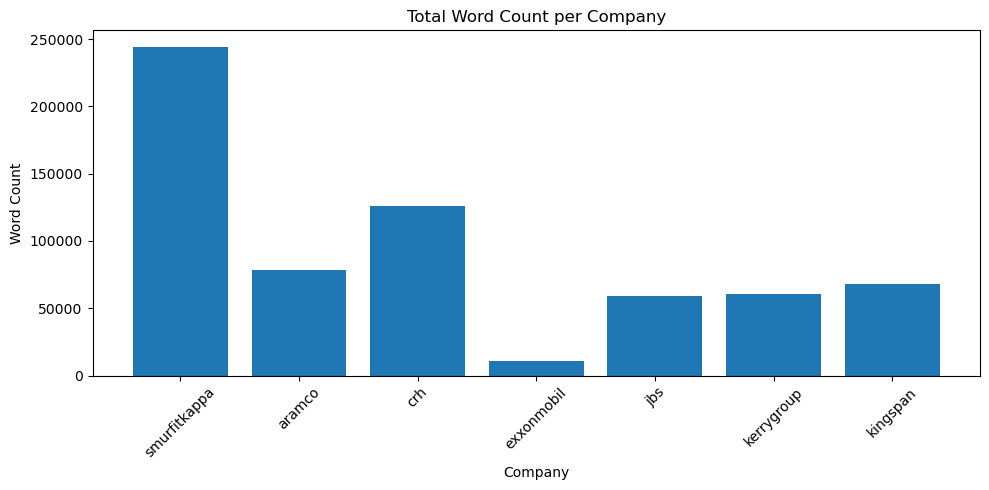

In [ ]:
# Print cleaned word count we have for each company
# we're usign the agregated words per company
for company, text in combined_per_comp_text.items():
    print("----- ")
    print(f"{company.lower()} - Total words:  {len(text.split())}")
    # print(text[:1000])  # print first 1000 characters to avoid overflow
    # print(f"\n[Total words: {len(text.split())}]")
    
word_counts = {company: len(text.split()) for company, text in combined_per_comp_text.items()}

# PLot the word count per company so we have an easier visualization
plt.figure(figsize=(10, 5))
plt.bar(word_counts.keys(), word_counts.values())
plt.title("Total Word Count per Company")
plt.xlabel("Company")
plt.ylabel("Word Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4.8 Plot - top 50 words with highest frequency per company

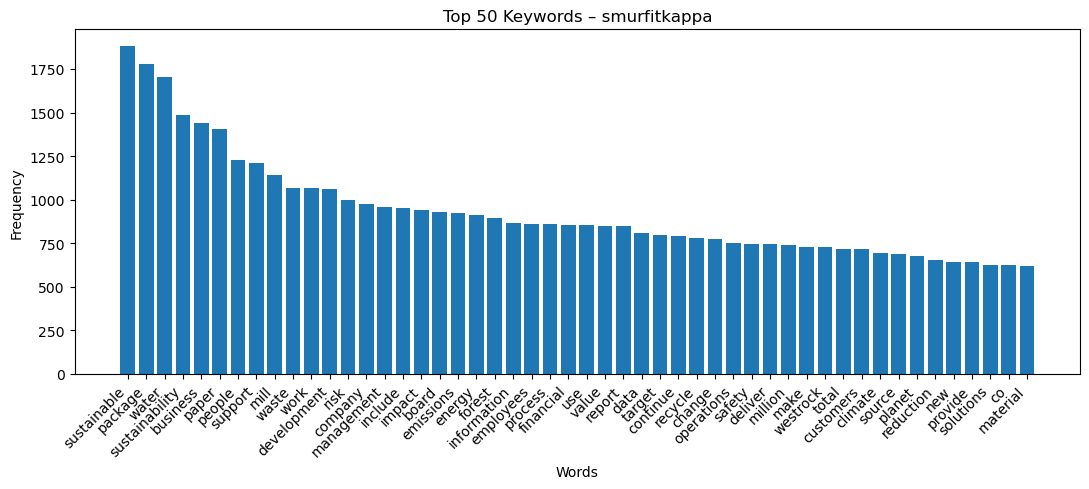

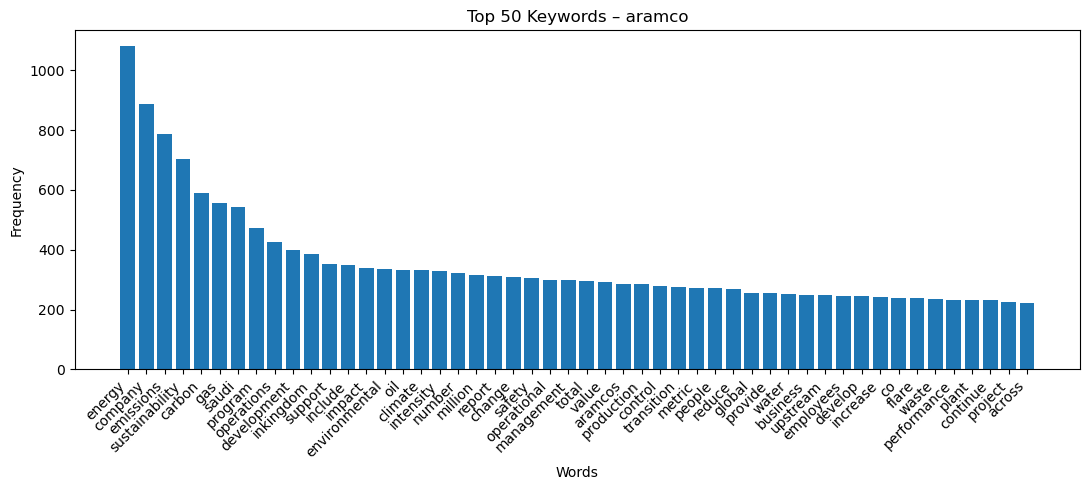

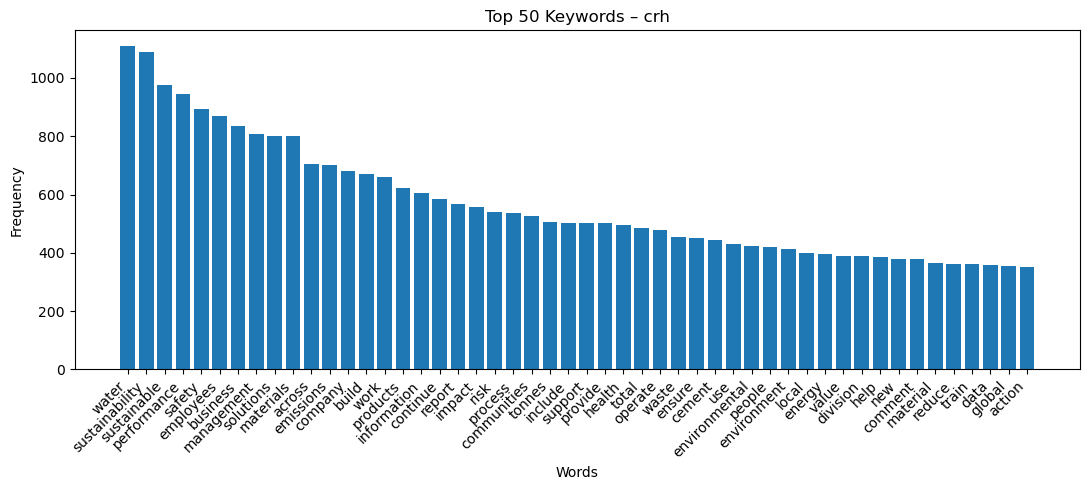

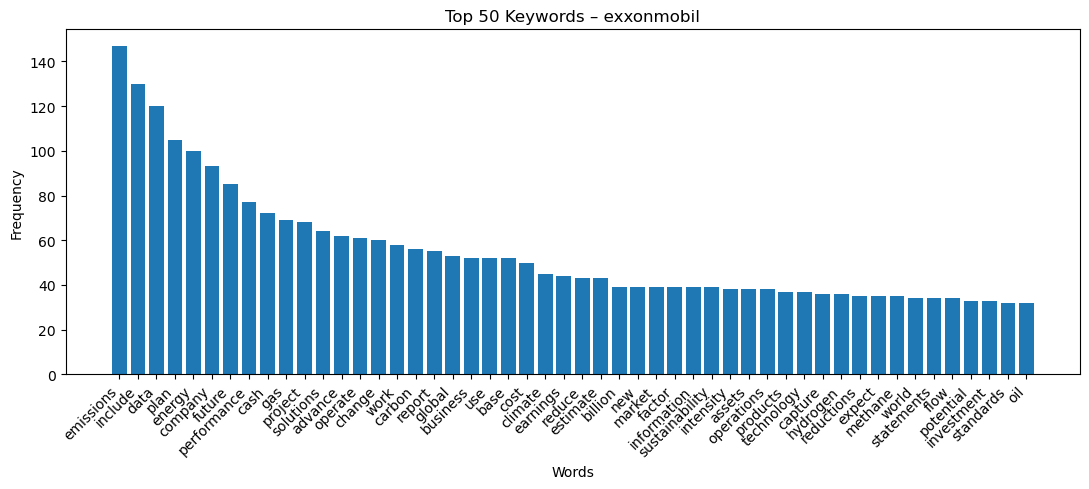

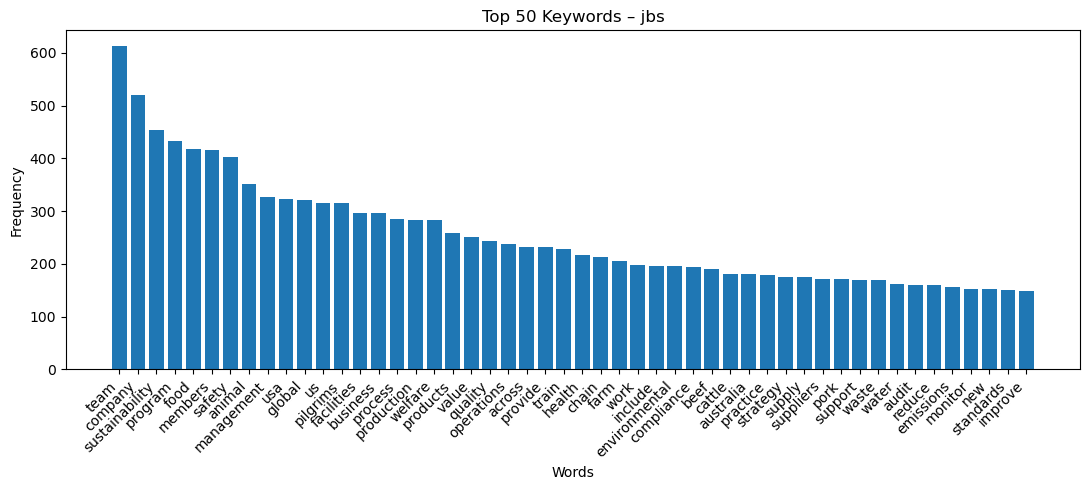

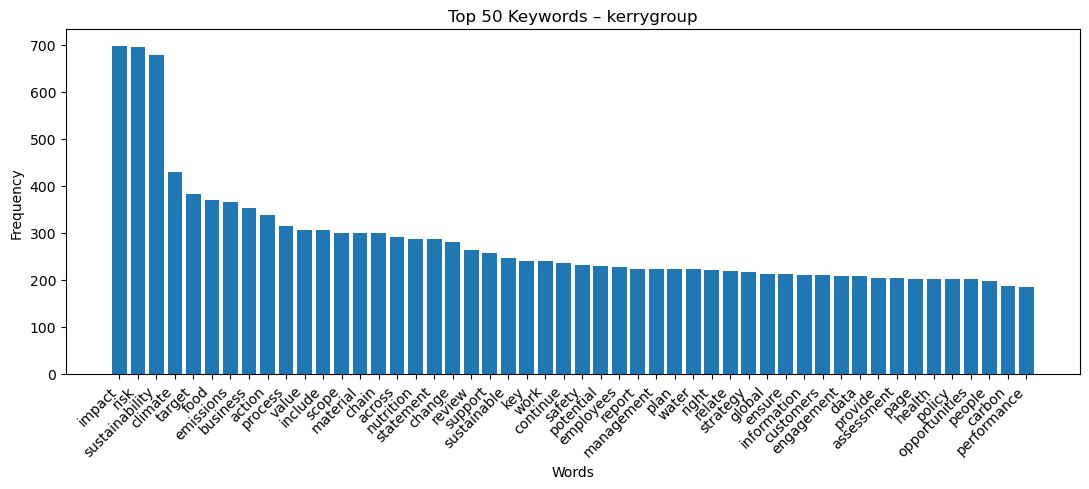

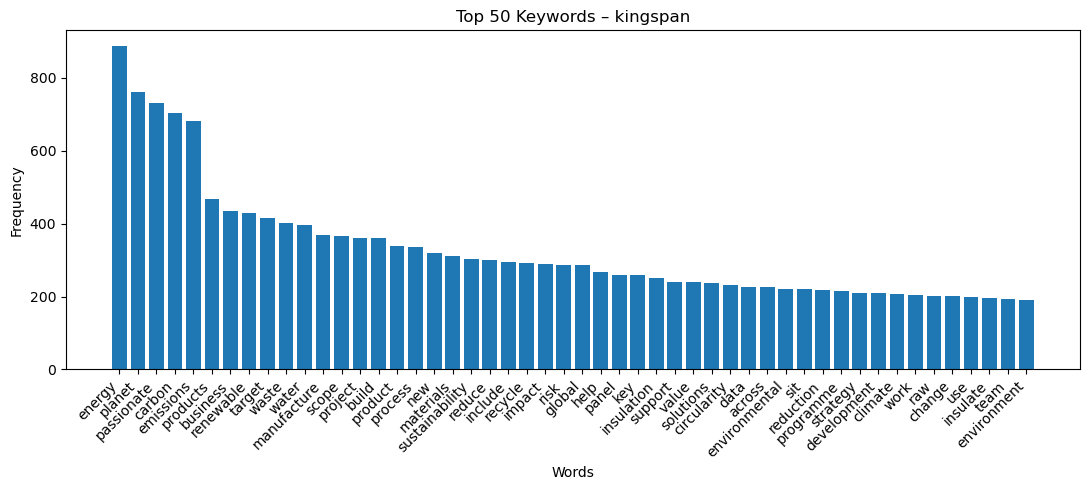

In [57]:
# plot the 50 words with the highest frequency from each company

for company, text in combined_per_comp_text.items():
    tokens = text.split()
    word_freq = Counter(tokens)
    top_words = word_freq.most_common(50)

    words, counts = zip(*top_words)

    plt.figure(figsize=(11, 5))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Top 50 Keywords – {company}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    # plt.gca().invert_yaxis()
    # ax=plt.gca()
    # ax.xaxis.set_ticks_position('both')
    # ax.xaxis.set_label_position('top')
   
    
    plt.tight_layout()

    # Save to file instead of displaying
    plt.savefig(f"{company}_top50_keywords.png")
    plt.tight_layout()
    plt.show()
    plt.close()

4.9 Plot - wordcloud per word frequency per company

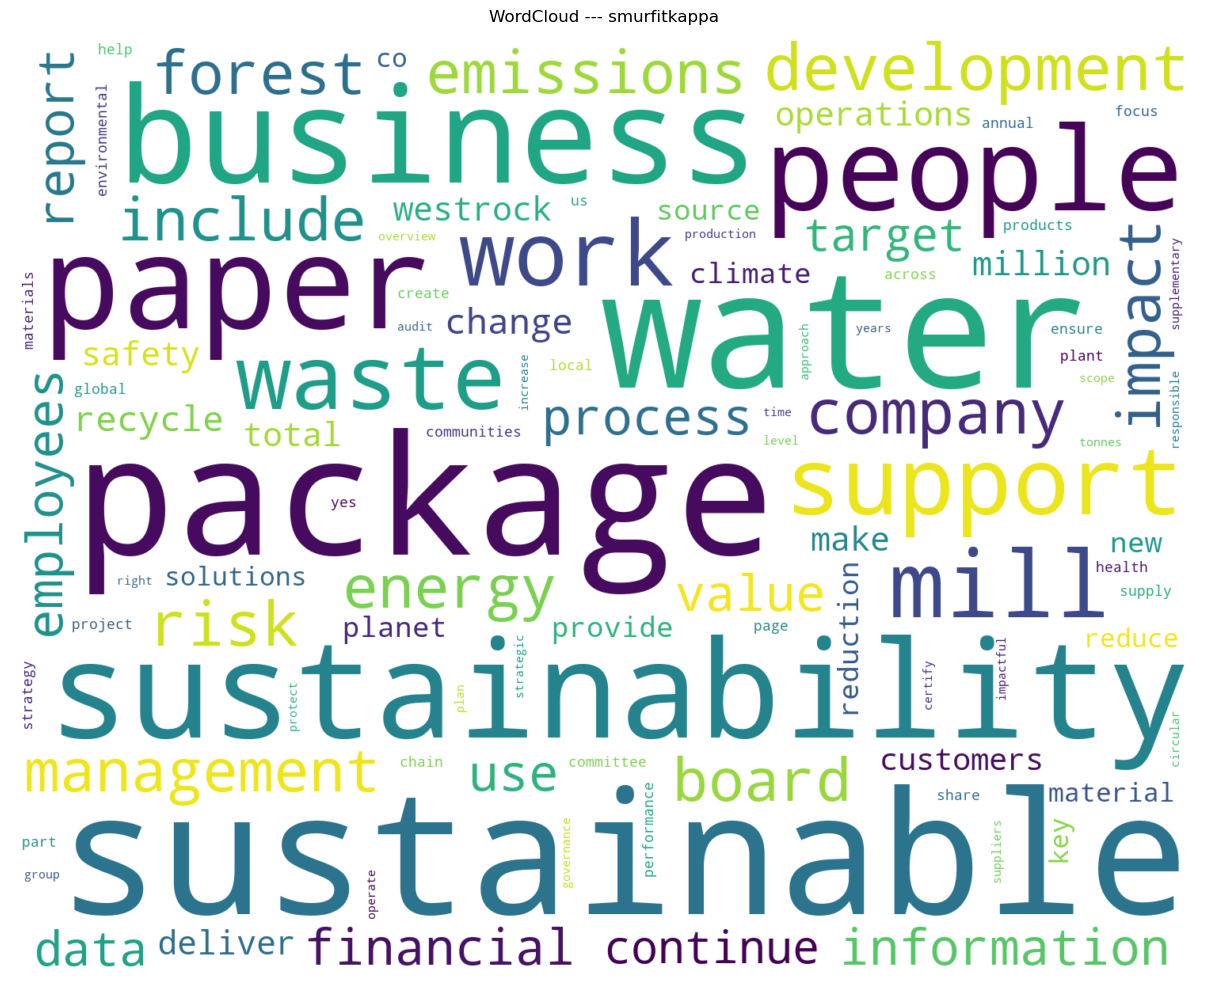

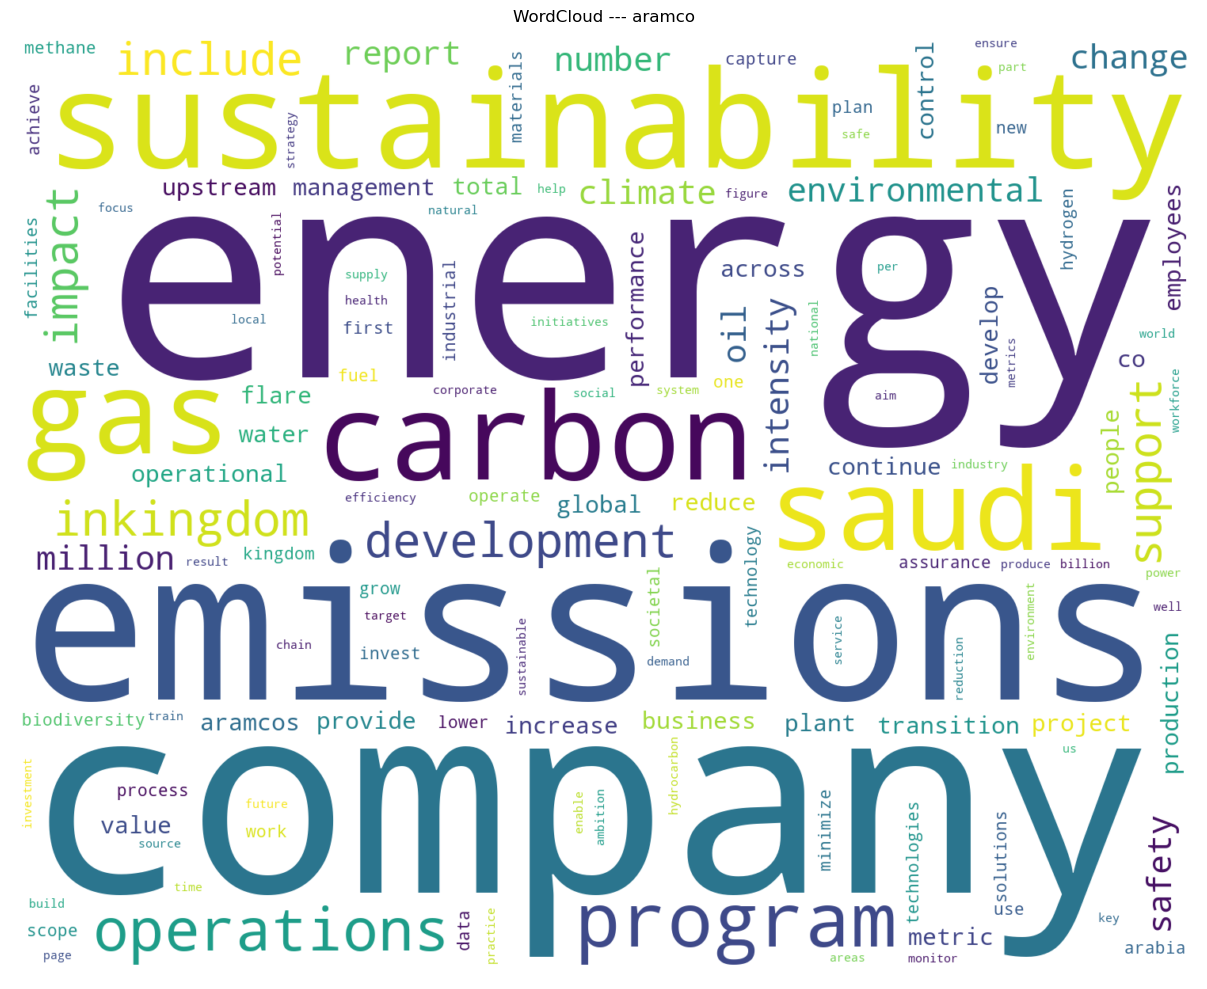

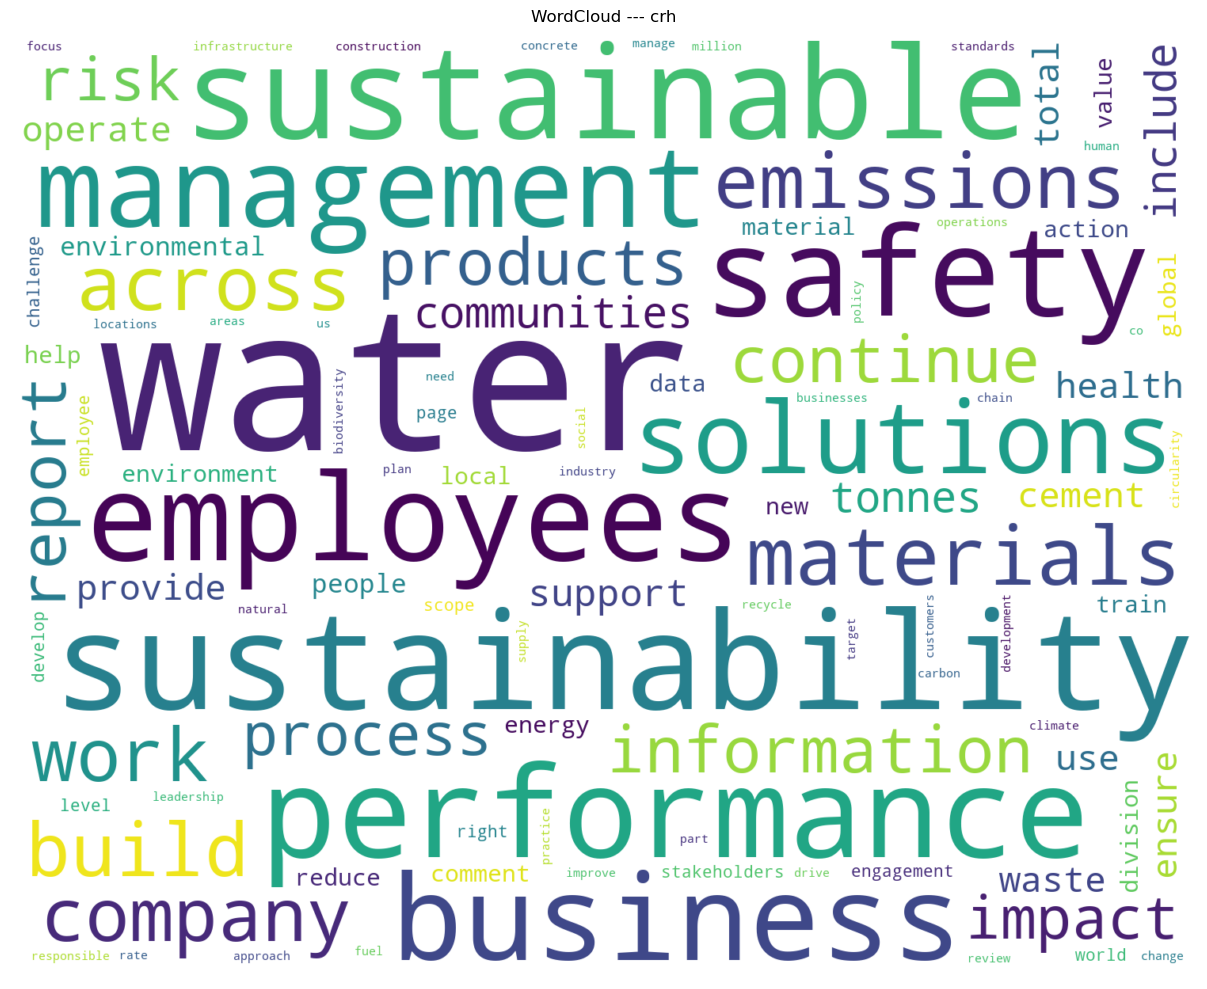

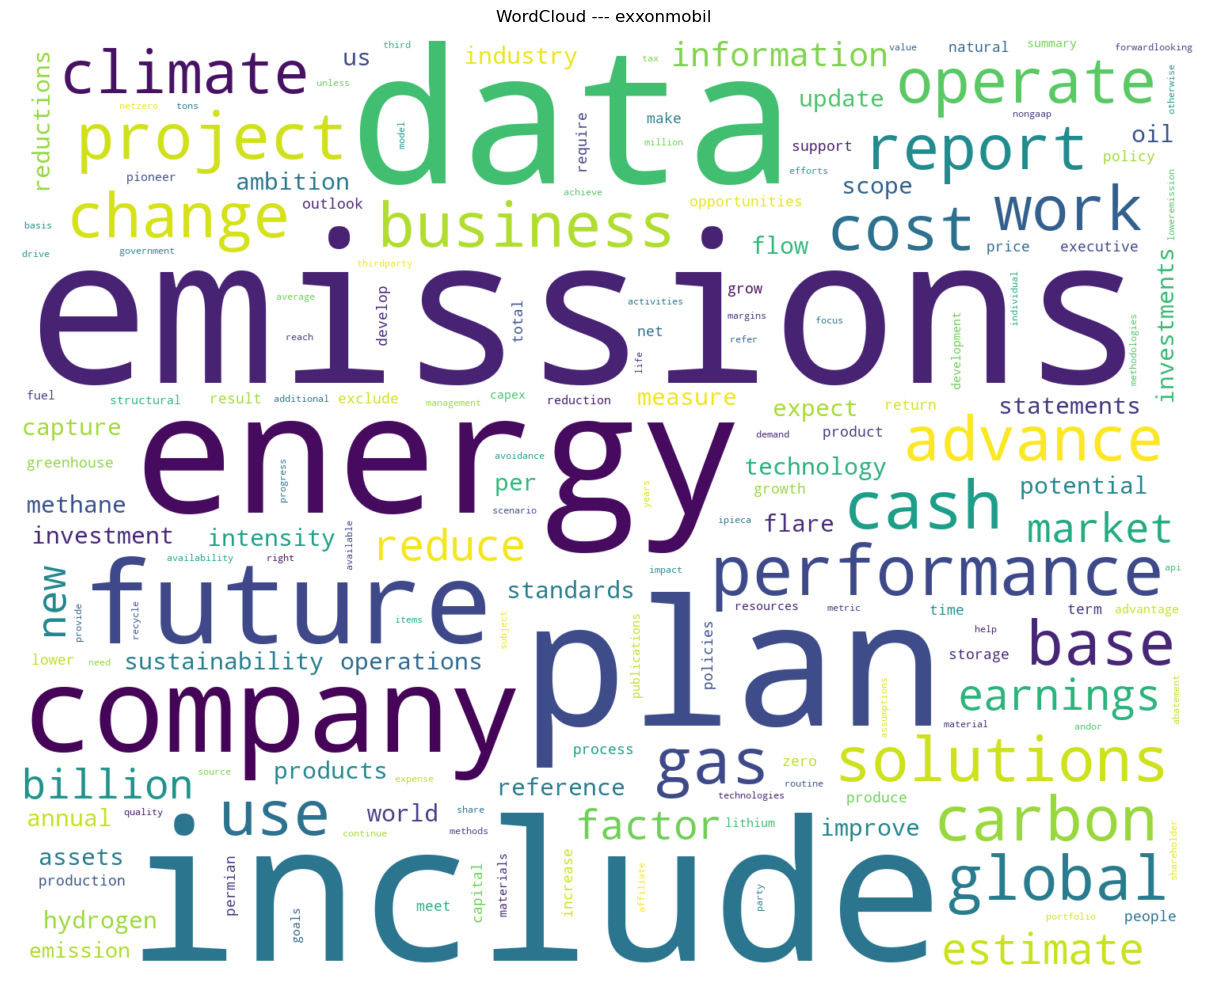

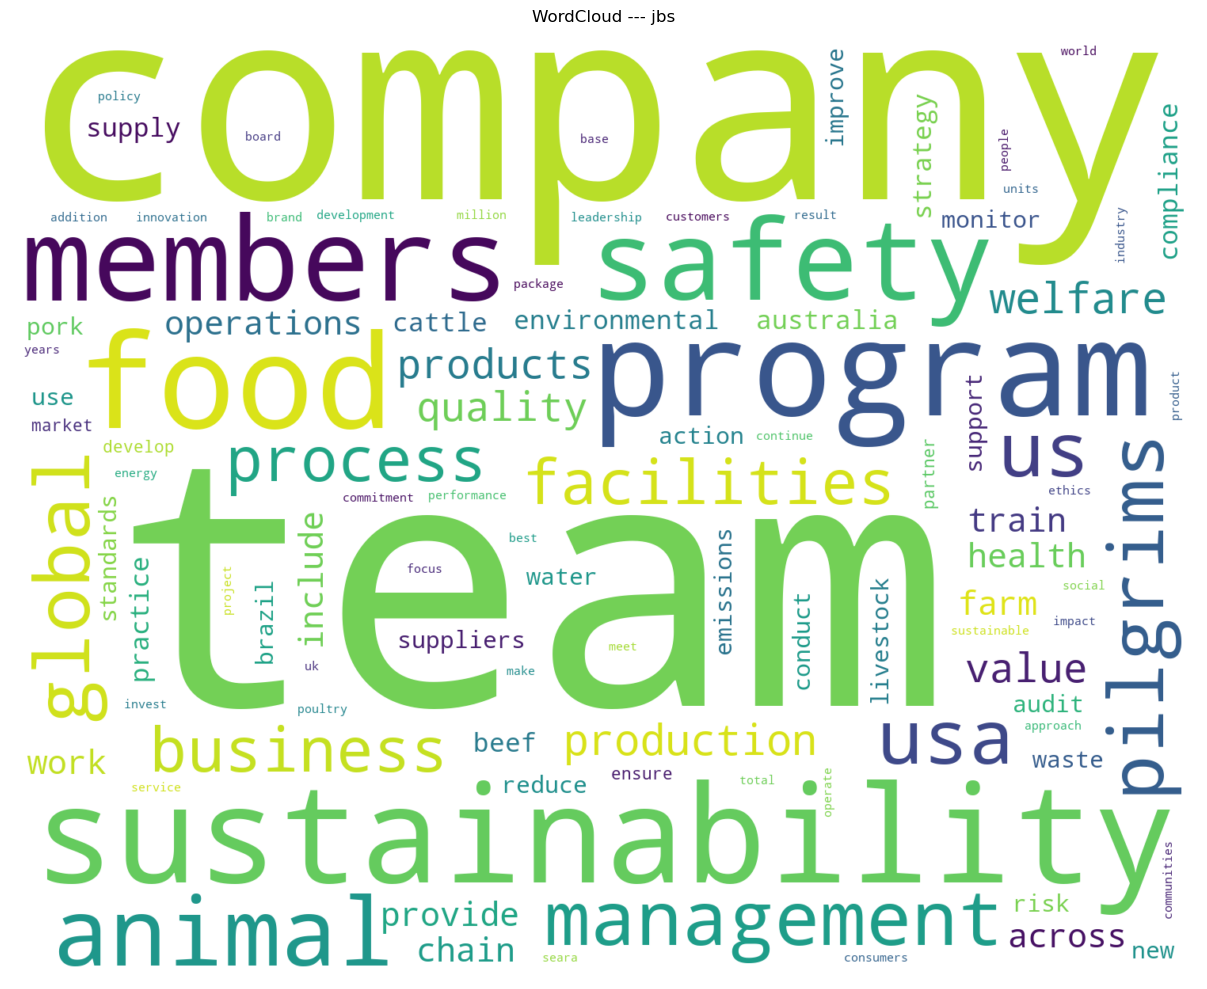

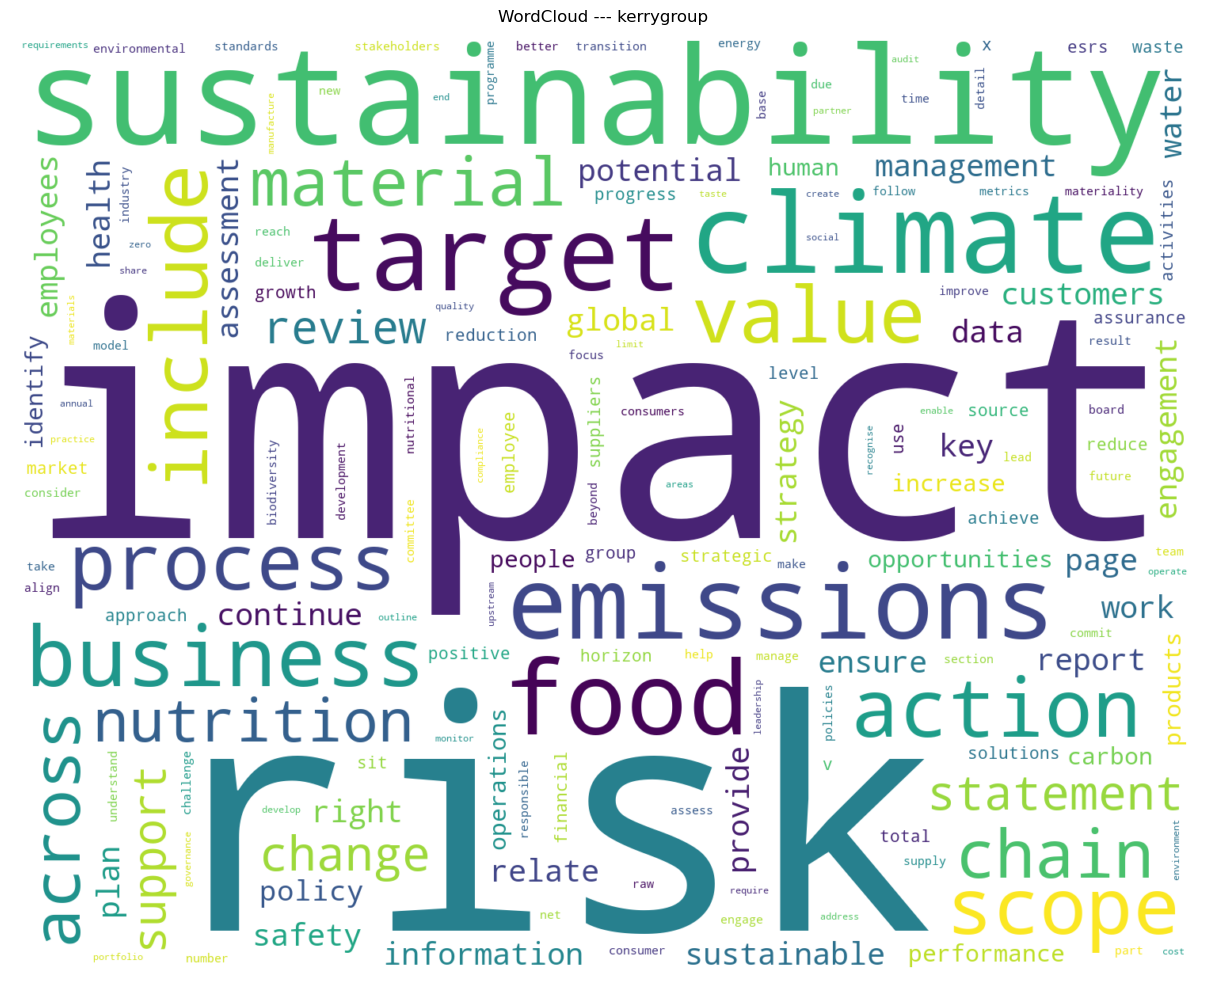

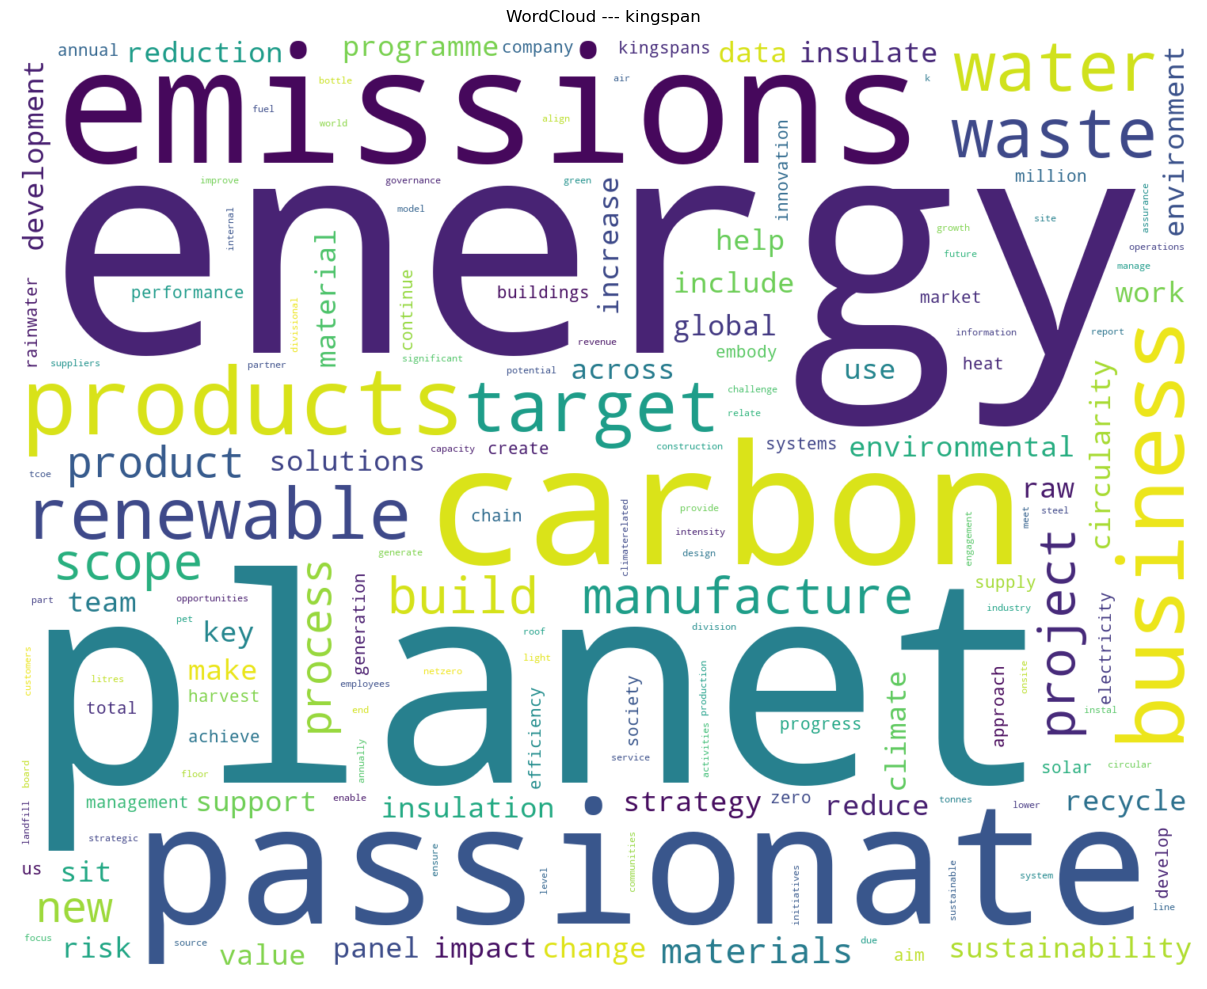

In [58]:

# Create wnrd cloud based of word frequency
for company, text in combined_per_comp_text.items():
    filtered_words = text.split()
    cnt = Counter(filtered_words)
    
    
    wc = WordCloud(max_words=1000, margin=10, background_color='white', 
                    scale=3, relative_scaling=0.5, width=500,height=400,
                    random_state=1).generate_from_frequencies(cnt)

    plt.figure(figsize=(20, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud --- {company}")
    plt.tight_layout()
    plt.savefig(f"{company}_wordcloud_word-req.png")
    plt.show()

4.10 Plot - positive ethical word count per company

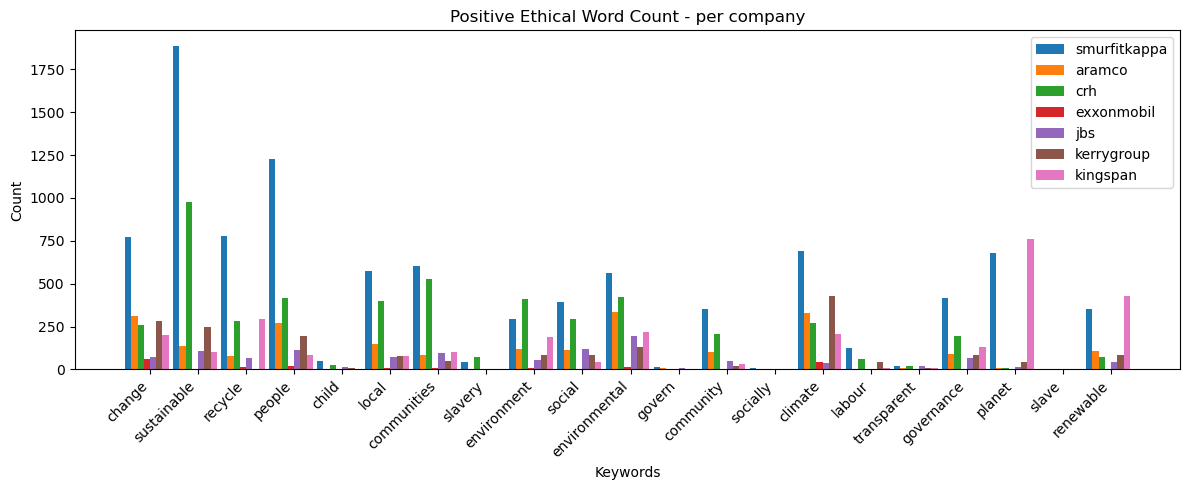

In [59]:
# Positive ethical word list count -  this is a list we defined earlier in pos_eti_words
# Get nbumber os times key positive words appear per company and plot the result
company_names = list(combined_per_comp_text.keys())
word_counts = {word: [] for word in pos_eti_words}

for word in pos_eti_words:
    for company in company_names:
        tokens = combined_per_comp_text[company].split()
        freq = Counter(tokens)
        word_counts[word].append(freq.get(word, 0))

# Plot grouped bar chart
x = np.arange(len(pos_eti_words))  # words on x-axis
bar_width = 0.13

plt.figure(figsize=(12, 5))
for idx, company in enumerate(company_names):
    counts = [word_counts[word][idx] for word in pos_eti_words]
    plt.bar(x + idx * bar_width, counts, width=bar_width, label=company)

plt.xticks(x + bar_width * (len(company_names) / 2), pos_eti_words, rotation=45, ha='right')
plt.xlabel("Keywords")
plt.ylabel("Count")
plt.title("Positive Ethical Word Count - per company")
plt.legend()
plt.tight_layout()
plt.show()

4.11 Plot - top 20 highest frequency words across all companies

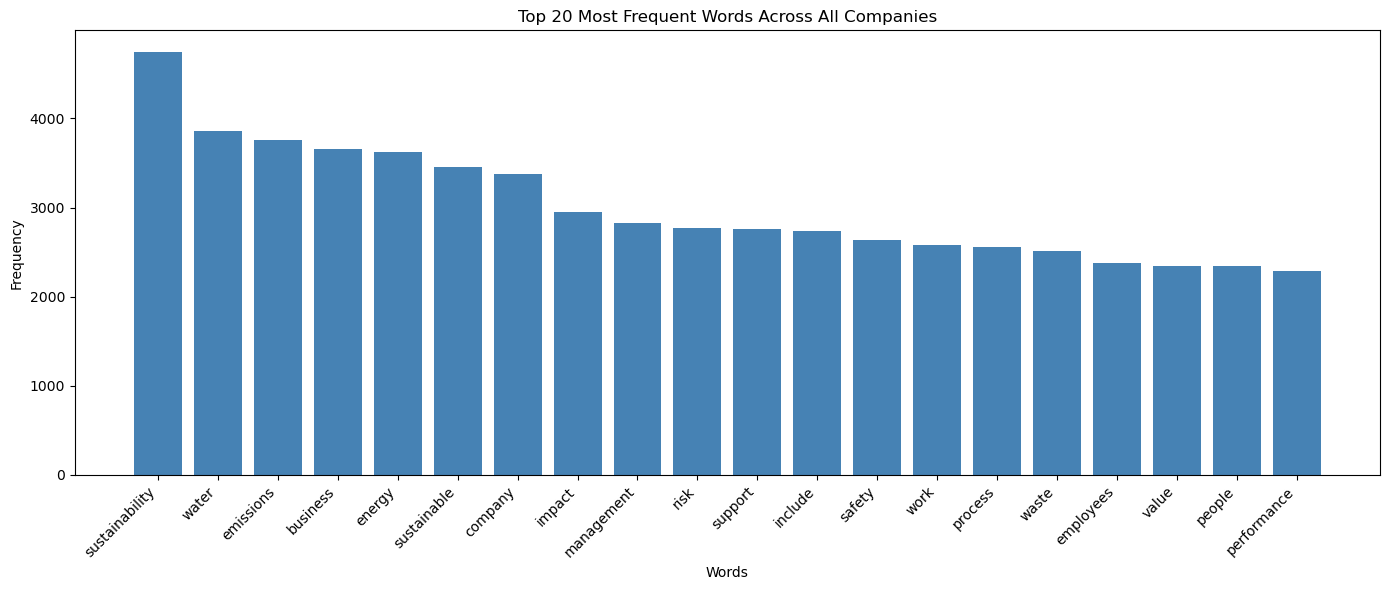

In [60]:
# Combine all words from all companies into one list to get top 20 istr of words
# Total Cumulative list or word occurence
all_tokens = []
for text in combined_per_comp_text.values():
    all_tokens.extend(text.split())

# Count total frequency across all companies
total_freq = Counter(all_tokens)

# Get top 20 most common words
top_20 = total_freq.most_common(20)
words, counts = zip(*top_20)

# Plot the words vs frequency
plt.figure(figsize=(14, 6))
plt.bar(words, counts, color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Frequent Words Across All Companies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

4.12 Plot - ethical words occurence per company - normalised per 1000 words (as we do not have even distribution of data for each company)

Companies with fewest ethical keyword mentions per 1,000 words:
exxonmobil: 18.09 mentions per 1000 words
jbs: 20.01 mentions per 1000 words
aramco: 28.77 mentions per 1000 words
kerrygroup: 30.98 mentions per 1000 words
crh: 39.19 mentions per 1000 words
smurfitkappa: 40.3 mentions per 1000 words
kingspan: 42.42 mentions per 1000 words


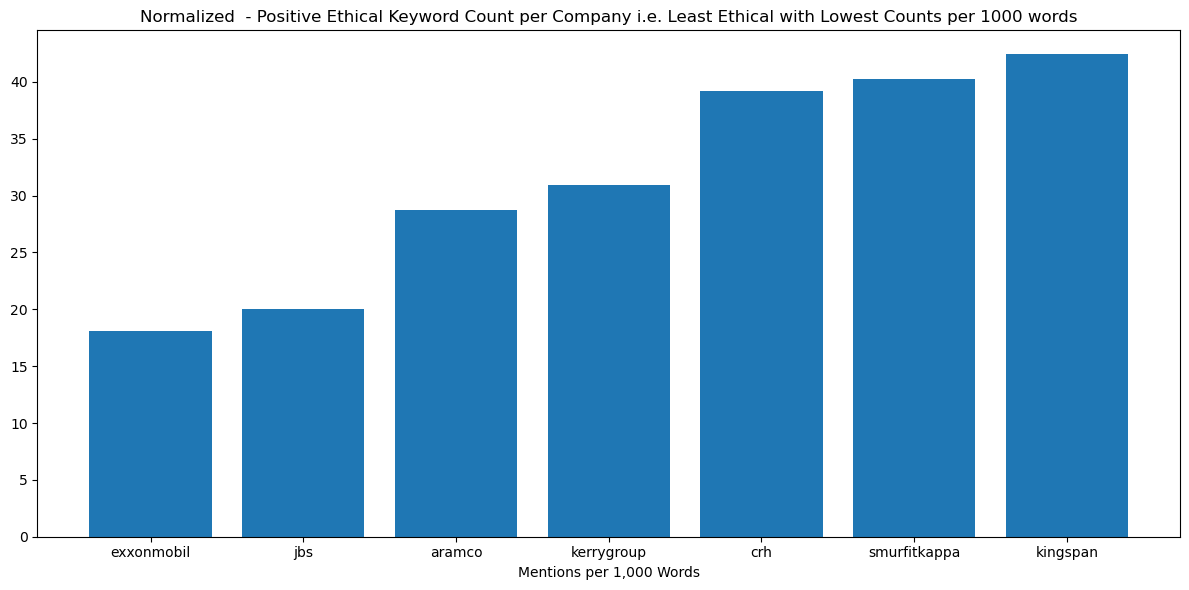

In [61]:
# Count normalized keyword mentions per company - we wil use a sample rate of 1000 words to normalise
normalized_counts = {}
for company, text in combined_per_comp_text.items():
    tokens = text.split()
    total_words = len(tokens)
    word_freq = Counter(tokens)
    keyword_mentions = sum(word_freq[word] for word in pos_eti_words if word in word_freq)
    
    mentions_per_1000 = (keyword_mentions / total_words) * 1000 if total_words > 0 else 0
    normalized_counts[company] = round(mentions_per_1000, 2)

# Sort by fewest mentions per 1000 words
sorted_normalized = sorted(normalized_counts.items(), key=lambda x: x[1])

companies, rates = zip(*sorted_normalized)

# Print the results
print("Companies with fewest ethical keyword mentions per 1,000 words:")
for company, rate in sorted_normalized:
    print(f"{company}: {rate} mentions per 1000 words")
    
# Plot
plt.figure(figsize=(12, 6))
plt.bar(companies, rates)
plt.xlabel("Mentions per 1,000 Words")
plt.title("Normalized  - Positive Ethical Keyword Count per Company i.e. Least Ethical with Lowest Counts per 1000 words")
plt.tight_layout()
plt.show()

4.13 Data Exploration and Analysis - Conclusions

- The word that appears the most across all companies = 'sustainability'
- words such as 'child', 'slave', 'labour' do not appear in the list of top 20 words across all companies, even the higher esg rated companies.
- Only 'crh' and 'smurfitKappa' mention slavery in their report
- *smurfitkappa*, *kerrygroup* and *crh* all mention 'labour' which may be an indication their position, or at least awareness, on labour practices. poorer rated esg companies do not mention 'labour'
- 'social' and 'governance' terms or their derivatives, while present, do not appear in huge frequencies. Perhaps an indication of the prioritization on environmental aspect of esg.
- 'transparency' also does not appear frequently.
- The term 'governance' and possibly 'transparency' could appear more in the investor reports as it may have an emphasis there in relation to management, but the other two terms would be expected to appear, perhaps more, in the sustainability reports. 


The final plot or ethical words per company normalised per 1000 words shows promise for our proof of concept.
- three companies who were chosen for their poor esg ratings, namely *exxonmobil*, *jbs* and *aramco*, all appeared bottom of the list of - positive ethical word counts per 100 words.
- four companies who were chosen for their high esg ratings,= *kerrygroup*, *crh*, *snmufitkappa* and *kingspan* all appear at the top of the graph.
- It would require more investigation but could be an indication of an potentially usable approach to differentiate between good and bad esg companies. This was the first indication  of possibility of this being a viable approach. 
- we tried different values for the positive ethical words and settled on the existing list. We wanted to avoid business related terms and focus on key esg values as this is proof of concept focus.


## Step 5 - Classification Models

5.1 - Split dataset into features and target labels

In [75]:
# define good companies and bad companies#
# sorting into positive and negative companies based off existing industry esg ratings
# as have fata already extracted froim files will just assign exisint gdat based ont hen company key in the data
# won't use load_files method as haver dat already extracted

good_companies = {"kerrygroup", "crh", "smurfitkappa", "kingspan"}
bad_companies = {"exxonmobil", "jbs", 'aramco'}

#contains processed cleaned report text from 
X_texts = []
y_labels = []


# assign positive y label to good companies
# 1 is positive > 0 is negative
# we have two data set_matplotlib_closeprocessed_per_file_data = contains > "company": company,  "filename": pdf_file.name,  "text": cleaned >>> all data is separate dout per file and company key-value pairs
# combined_per_comp_text = contains > [record["company"]] += " " + record["text"] >>> all data is combined across companies
# we'll use the first as we have it separated out at file level giving us more elements to train with
for record in processed_per_file_data:
    company = record['company'].lower()
    text = record['text']
    
    
    if company.lower() in good_companies:
        X_texts.append(text)
        y_labels.append(1)

    elif company.lower() in bad_companies:
        X_texts.append(text)
        y_labels.append(0)
    

5.2 - Verify variables are as expoected

In [76]:
# quick check tomake sure we're using the right variables and they are what we expect going into the models
print("Total documents:", len(X_texts))  # Should be 43
print("Good ESG count:", y_labels.count(1))  # Should be 33
print("Bad ESG count:", y_labels.count(0))  # Should be 10


Total documents: 43
Good ESG count: 33
Bad ESG count: 10


5.3 - Vectorize the text

In [77]:
vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.7)

# Uses vectorization – takes all those words, getting into AI agent approach, rather than a single variable, converts variable into whole load of different dimensions
X_counts = vectorizer.fit_transform(X_texts).toarray()



5.4 -  Apply tf-idf transformation

In [78]:
# normalise the term frequency across the documents
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X_counts).toarray()

5.5 - Split data into train and test data and verify target variable data

30
30
13
13
0.6976744186046512
0.3023255813953488


<Axes: title={'center': 'Count (Pre-SMOTE - Target Variable in y_train dataset)'}>

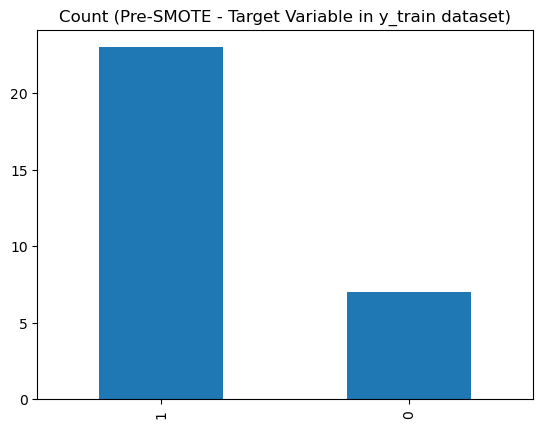

In [79]:
# spliut intotrain and test
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.3, random_state=42, stratify=y_labels)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(len(X_train)/(len(X_train)+len(X_test)))
print(len(X_test)/(len(X_train)+len(X_test)))

pd.Series(y_train).value_counts().plot(kind='bar', title='Count (Pre-SMOTE - Target Variable in y_train dataset)')

5.6 - Create Models, perform cross validation and plot ROC AUC

Empty DataFrame
Columns: [Classifier, Accuracy (CV Mean)]
Index: []
KFold(n_splits=5, random_state=42, shuffle=True)
Cross-validation accuracy for GaussianNB: 0.9333333333333333
true pos and fal pos [0.         0.28571429 1.        ] [0. 1. 1.]:
Confusion Matrix for GaussianNB (Cross-Validation):
[[ 5  2]
 [ 0 23]]

Cross-validation accuracy for DecisionTreeClassifier: 0.7333333333333333
true pos and fal pos [0.         0.85714286 1.        ] [0.         0.91304348 1.        ]:
Confusion Matrix for DecisionTreeClassifier (Cross-Validation):
[[ 2  5]
 [ 1 22]]

Cross-validation accuracy for RandomForestClassifier: 0.8333333333333334
true pos and fal pos [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.14285714 0.14285714 0.14285714
 1.        ] [0.         0.04347826 0.13043478 0.2173913  0.30434783 0.47826087
 0.60869565 0.69565217 0.73913043 0.7826087  0.91304348 1.
 1.        ]:
Confusion Matrix for RandomForestClassifier (Cross-Validatio

<Figure size 640x480 with 0 Axes>

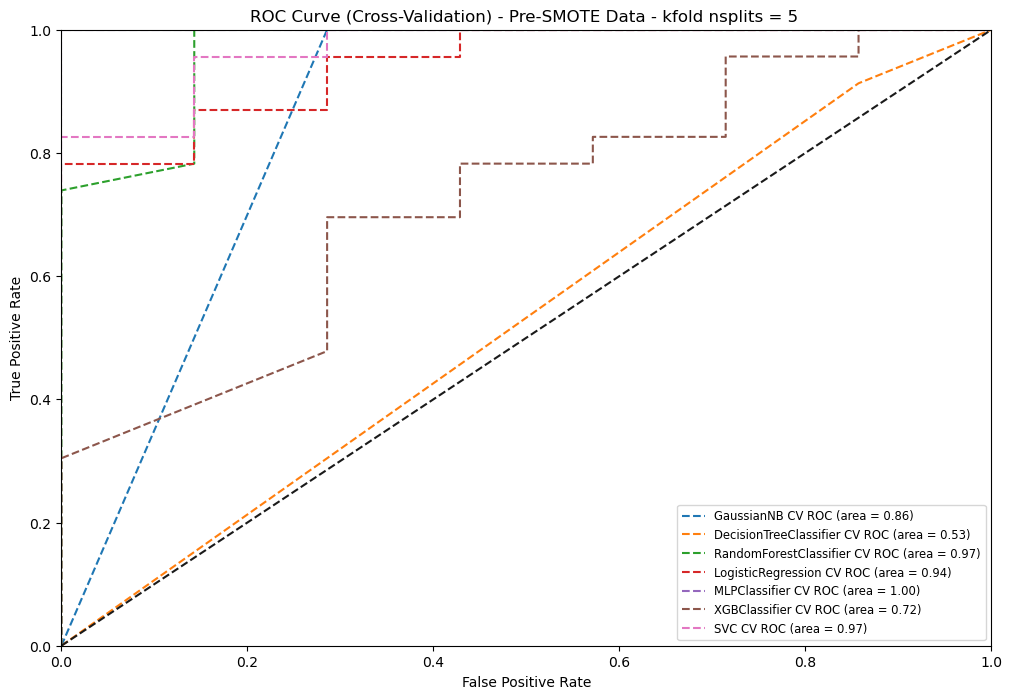

               Classifier  Accuracy (CV Mean)
0              GaussianNB            0.933333
0  DecisionTreeClassifier            0.733333
0  RandomForestClassifier            0.833333
0      LogisticRegression            0.766667
0           MLPClassifier            0.966667
0           XGBClassifier            0.800000
0                     SVC            0.833333


In [81]:
# perform cross validation and plot the output
classifiers = [
   ('NB', GaussianNB()),
   ('DT', DecisionTreeClassifier()),
   ('RF', RandomForestClassifier()),
   ('LR', LogisticRegression()),
   ('NN', nn.MLPClassifier()),
   ('XGB', XGBClassifier(n_estimators=100)),
   ('SVC', SVC(probability=True))]

# Logging setup
log_cols = ["Classifier", "Accuracy (CV Mean)"]
log = pd.DataFrame(columns=log_cols)
print(log)

# Plot ROC curve for K-fold, cross-validated predictions
plt.clf()
plt.figure(figsize=(12, 8))

# Define the cross-validation strategy, we tried different numbers 3, 5, 10, 20 and 30,can't exceed the number of samples. The data set is small so it doesn't take too long. Set at 3 for now to keep runtime low for demo purposes.
cv = KFold(n_splits=5, shuffle=True, random_state=42)
print(cv)

# Loop through classifiers 
for name, model in classifiers:
    name = model.__class__.__name__

    # Get cross validation prediction and probability
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')
    y_pred_proba = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]

    #  cross-validation accuracy scores and mean accuracy
    cv_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    cv_mean = np.mean(cv_scores)
    print(f"Cross-validation accuracy for {name}: {cv_mean}") 
   
    # ROC curve and AUC for cross-validated model
    ## here we using cross_val_predict : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html

    #sklearn.model_selection.cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, 
    #params=None, pre_dispatch='2*n_jobs', method='predict')

    ## basically getting model.predict_proba but for the cross validation figures. 

    #### Note we aren't comparing these directly, but just seeing if there are large differences between them more so. between cross validation 
    #### and the actual model evaluations below
    ####### Note also this is all done on x_train and y_train. 
    
    fpr_cv, tpr_cv, _ = roc_curve(y_train, y_pred_proba)
    roc_auc_cv = auc(fpr_cv, tpr_cv)
    print(f"true pos and fal pos {fpr_cv} {tpr_cv}:")

    # Log results
    log_entry = pd.DataFrame([[name, cv_mean]], columns=log_cols)
    log = pd.concat([log, log_entry])
   
    # Plot ROC curves for cross-validation model
    plt.plot(fpr_cv, tpr_cv, linestyle='--', label='%s CV ROC (area = %0.2f)' % (name, roc_auc_cv))

    # Print confusion matrix for cross-validated predictions
    cm_cv = confusion_matrix(y_train, y_pred_cv)
    print(f"Confusion Matrix for {name} (Cross-Validation):")
    print(cm_cv)
    print('')


# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Cross-Validation) - Pre-SMOTE Data - kfold nsplits = 5 ')
plt.legend(loc=0, fontsize='small')
plt.show()

# Print log of results
print(log)

5.7 - Plot Accuracy data

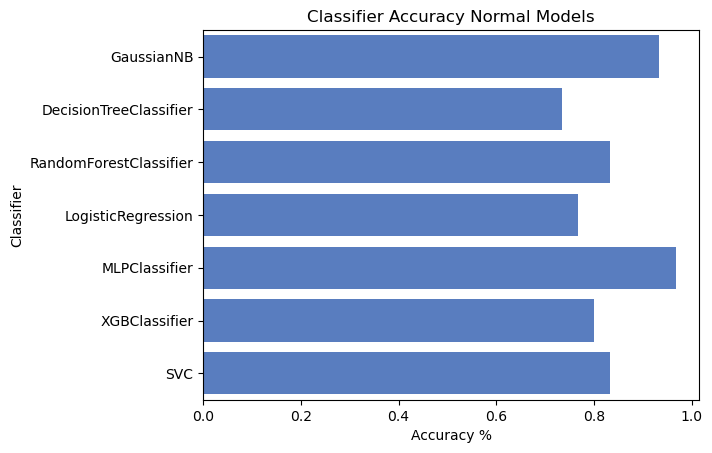

In [82]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy (CV Mean)', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy Normal Models')
plt.show()


5.8 - Apply SMOTE to data to oversample the minority class and verify target variable data

SMOTE over-sampling:
-----
length of 'X_train' = 46
length of 'y_train' = 46
-----


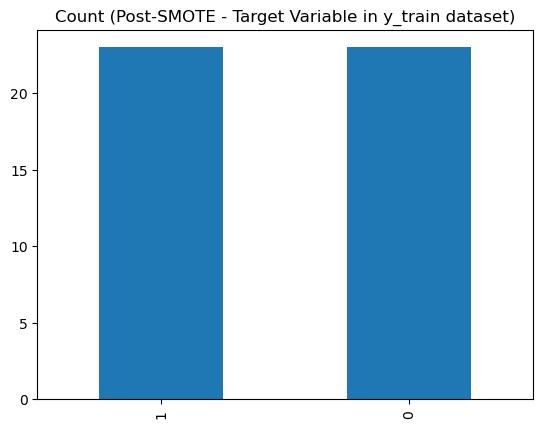

In [83]:
# ---SMOTE----


# Apply SMOTE only to training data
sm = SMOTE(random_state=42)
X_train_ps, y_train_ps = sm.fit_resample(X_train, y_train)

print('SMOTE over-sampling:')
print('-----')
print('length of \'X_train\' = {}'.format(len(X_train_ps)))
print('length of \'y_train\' = {}'.format(len(y_train_ps)))
print('-----')


#plot post SMOTE of just the target variable
# y_train_ps['Target'].value_counts().plot(kind='bar', title='Count (Post-SMOTE - Target Variable in y_train dataset')
# y_train_ps.value_counts().plot(kind='bar', title='Count (Post-SMOTE - Target Variable in y_train dataset)')
pd.Series(y_train_ps).value_counts().plot(kind='bar', title='Count (Post-SMOTE - Target Variable in y_train dataset)')

# re-associate the '_ps' naming with the standard X_train and y_train naming, as it it used through modelling process below
X_train=X_train_ps
y_train=y_train_ps

5.9 - Create the Models using SMOTE data set

Empty DataFrame
Columns: [Classifier, Accuracy (CV Mean)]
Index: []
KFold(n_splits=5, random_state=42, shuffle=True)
Cross-validation accuracy for GaussianNB: 1.0
true pos and fal pos [0. 0. 1.] [0. 1. 1.]:
Confusion Matrix for GaussianNB (Cross-Validation):
[[23  0]
 [ 0 23]]

Cross-validation accuracy for DecisionTreeClassifier: 0.8022222222222222
true pos and fal pos [0.         0.04347826 1.        ] [0.         0.69565217 1.        ]:
Confusion Matrix for DecisionTreeClassifier (Cross-Validation):
[[22  1]
 [ 6 17]]

Cross-validation accuracy for RandomForestClassifier: 1.0
true pos and fal pos [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.26086957 0.34782609 0.43478261
 0.60869565 0.73913043 0.91304348 1.        ] [0.         0.04347826 0.13043478 0.2173913  0.56521739 0.65217391
 0.69565217 0.7826087  1.         1.         1.         1.
 1.         1.         1.         1.        ]:
Confusion Matrix for RandomForestClassifier (Cro

<Figure size 640x480 with 0 Axes>

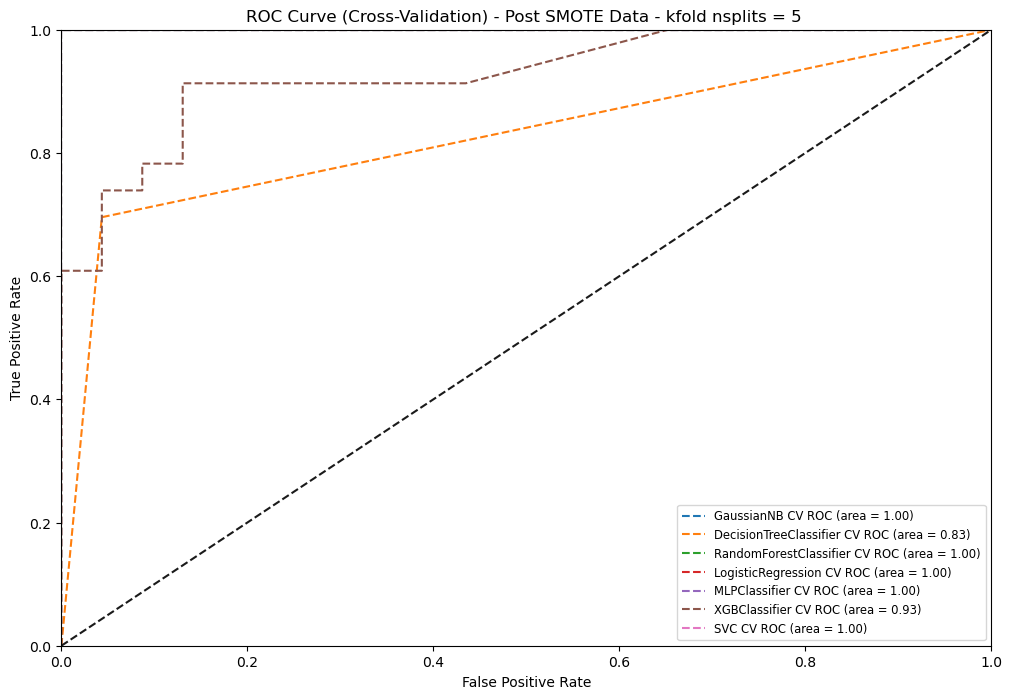

               Classifier  Accuracy (CV Mean)
0              GaussianNB            1.000000
0  DecisionTreeClassifier            0.802222
0  RandomForestClassifier            1.000000
0      LogisticRegression            1.000000
0           MLPClassifier            0.980000
0           XGBClassifier            0.868889
0                     SVC            1.000000


In [84]:
# perform cross validation and plot the output
classifiers = [
   ('NB', GaussianNB()),
   ('DT', DecisionTreeClassifier()),
   ('RF', RandomForestClassifier()),
   ('LR', LogisticRegression()),
   ('NN', nn.MLPClassifier()),
   ('XGB', XGBClassifier(n_estimators=100)),
   ('SVC', SVC(probability=True))]

# Logging setup
log_cols = ["Classifier", "Accuracy (CV Mean)"]
log = pd.DataFrame(columns=log_cols)
print(log)

# Plot ROC curve for K-fold, cross-validated predictions
plt.clf()
plt.figure(figsize=(12, 8))

# Define the cross-validation strategy, we tried different numbers 3, 5, 10, 20 and 30,can't exceed the number of samples. 20 appeears to be close ot the sweet spot for number of kfolds. The data set is small so it doesn't take too long. Set at 3 for now to keep runtime low for demo purposes.
cv = KFold(n_splits=5, shuffle=True, random_state=42)
print(cv)

# Loop through classifiers 
for name, model in classifiers:
    name = model.__class__.__name__

    # Get cross validation prediction and probability
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')
    y_pred_proba = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]

    #  cross-validation accuracy scores and mean accuracy
    cv_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    cv_mean = np.mean(cv_scores)
    print(f"Cross-validation accuracy for {name}: {cv_mean}") 
   
    # ROC curve and AUC for cross-validated model
    ## here we using cross_val_predict : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html

    #sklearn.model_selection.cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, 
    #params=None, pre_dispatch='2*n_jobs', method='predict')

    ## basically getting model.predict_proba but for the cross validation figures. 

    #### Note we aren't comparing these directly, but just seeing if there are large differences between them more so. between cross validation 
    #### and the actual model evaluations below
    ####### Note also this is all done on x_train and y_train. 
    
    fpr_cv, tpr_cv, _ = roc_curve(y_train, y_pred_proba)
    roc_auc_cv = auc(fpr_cv, tpr_cv)
    print(f"true pos and fal pos {fpr_cv} {tpr_cv}:")

    # Log results
    log_entry = pd.DataFrame([[name, cv_mean]], columns=log_cols)
    log = pd.concat([log, log_entry])
   
    # Plot ROC curves for cross-validation model
    plt.plot(fpr_cv, tpr_cv, linestyle='--', label='%s CV ROC (area = %0.2f)' % (name, roc_auc_cv))

    # Print confusion matrix for cross-validated predictions
    cm_cv = confusion_matrix(y_train, y_pred_cv)
    print(f"Confusion Matrix for {name} (Cross-Validation):")
    print(cm_cv)
    print('')


# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Cross-Validation) - Post SMOTE Data - kfold nsplits = 5 ')
plt.legend(loc=0, fontsize='small')
plt.show()

# Print log of results
print(log)

5.10 - Plot Accuracy data

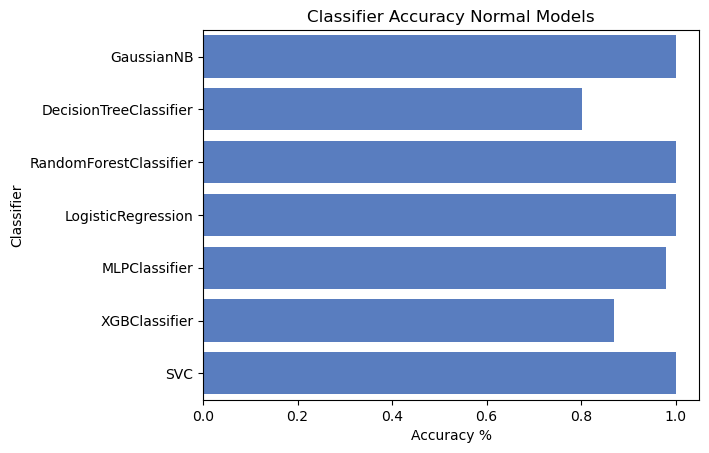

In [85]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy (CV Mean)', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy Normal Models')
plt.show()

5.10 - Evaluate Model Performance
- Some models performed reasonably well/ Was not expecting this given the limited data size. 
- *MLPClassifier* gives 1.0 ROC curve value and an accuracy of .925 in both pre and post SMOTE Data. This rings alarms bells that data is overfitting, or something is not right. This would require more investigation, would discount this model data.
- Best performing models
    - *LogisticRegression* - largest ROC AUC value at .95 but has an accuracy of .75 which is 5th best accuracy. Performed well.
    - *XGBClassifier* - 0.81 ROC AUC value abut has an accuracy of 0.875. Again performed well.
    - Other also performed reasonably well.

> LogisticRegression had the followinfg confusion matrix.

```py
[[ 0  7]
 [ 0 23]]


=> 7 False negatives - said 'bad' esg but was 'good' esg company
=> 23 True Positives - said 'good' esg and was 'good' esg company
=> 4 True Negatives - said 'bad' esg and was 'bad' esg company
=> 0 False Positive - said 'good' esg and was 'bad' esg company

```



> XGBClassifier had the following confusion matrix

```py
[[ 4  3]
 [ 1 22]]

=> 3 False negatives - said 'bad' esg but was 'good' esg company
=> 22 True Positives - said 'good' esg and was 'good' esg company
=> 4 True Negatives - said 'bad' esg and was 'bad' esg company
=> 0 False Positive - said 'good' esg and was 'bad' esg company
```

Fewer False negatives is important as means telling people the company has poor ethical esg values when infact it has good esg values. This could potentially be unfair and lost business to the companies who were incorrectly labelled. This would need further investigation to try minimise the False negative values.

Post-SMOTE applied data did make a difference. *SVC* has an ROC Value of .99, which again rings alarm bells and means this along with *MLPClassifier* would both be discounted as there is an issue with these being 1.0 or close to 1.0.

*XGBClassifier* and *LogisticRegression* remained stable and similar to the use of pre-smote data, whereas *DecisionTree* and *RandomForest* both deteriorated with SMOTE data.
 
Best model overall would possibly be a combination of **LogicalRegression** and **XGBClassifier**. These  both performed well and were stable in both scenarios.

Overall, a larger data set is still required to validate the data and performance and further investigation and validation is required. 


### Step 6 - Conclusions and Learnings

Can we predict whether a company has good or bad esg practices based on reviewing their company reports. This is indicated by 

- 1 = good 'esg' company
- 0 = bad 'esg' company


Somewhat surprisingly, two elements wold lead us to believe that this shows promise in text mining analysis and classification as a method to indicate 'esg' company performance
1. **Part 1.  Data Analysis**
    - The graph Positive Ethical Keyword Count per Company per 1000 words matches our expectations.
    - Least Ethical with Lowest Counts per 1000 words = *exxonmobil*, *jbs* and *aramco*
        - These 3 were selected as they have very low esg rating across our esg ratings i.e. bad esg companies
    - Companies with the Most ethical word counts per 1000 words  = *kerrygroup*, *crh*, *snmufitkappa* and *kingspan*
        - These 4 were selected due to their high esg ratings i.e. esg good esg companies
1. **Part 2. Classification**
    - The cross fold validation and smote correctly correctly predicted 10 and 5 bad companies respectively. This is tghe most positive sign for me and a good indication of potential, especially given our small data set. true negatives woudl be hardest to predict as companies will use positive terms in reports many times, but the model cna still predict bad esg performers despite this.
 

#### 6.1 Challenges
- Standardizing and cleaning the date. Not all reports are the same or standardized. Lots of variations in data provided and formats. 
Volume of data. Need to get a lot more company report
-   Time to process the pdfs is approx between 30 secs and 2 mins per pdf. This adds up when dealing with large numbers of pdfs... It takes approx 40 mins to process our small data set pof pdfs
-  Companies can stack the reports by repeating positive terms. Always a risk, even if our classification models could see through that in a good few instances in our data set
- Storage - we need to increase our dataset hugely across a traneg of sources to improve accuracy. Storage may become an issue as data storage needs increase....
    - we used 44 files across 7 companies which took up aprox 500 MB of space


#### 6.2 Improvements
- tie it into Company Registration Office (CRO) data to include ownership details
- Get more sample data
- Include social media and news articles for each company to enhance the data and catch potentisal negativity around it
- Include court documetn data
- if have different data sources i.e.company reports, social media, news, courts data can weight those accordingly to give more accurate result.

Overall, this has been surprisingly successful. The initial assumption would be that it would be too difficult to discern a companies esg status solely base don their company reports. However, this shows great potential if the data set could be increased and especially if it can eb broadened to include other sources other than self authored reports.

### Appendix - References

- [oralytics](https://oralytics.com/) >>> #GE2020 Analysing Party Manifestos using Python
- [https://github.com/pdfminer/pdfminer.six](https://github.com/pdfminer/pdfminer.six) >>> community maintained fork of the original PDFMiner
- [pdfprimer docs](https://pdfminersix.readthedocs.io)
- [https://www.nltk.org/](https://www.nltk.org/)
- [https://docs.python.org/3/howto/regex.html](https://docs.python.org/3/howto/regex.html)
- [https://regex101.com/](https://docs.python.org/3/howto/regex.html)
- General ESG references outside of those already included are :
    - [https://www.responsible-investor.com/](https://www.responsible-investor.com/)
    - [https://www.knowesg.com/](https://www.knowesg.com)
    - various news sites

[2] [Python – Convert list of dictionaries to JSON](https://www.geeksforgeeks.org/python-convert-list-of-dictionaries-to-json/)